In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE


In [3]:
np.random.seed(42)
n_samples = 1000

data = {
    "Gender": np.random.choice(["Male", "Female"], size=n_samples),
    "Married": np.random.choice(["Yes", "No"], size=n_samples),
    "Dependents": np.random.choice(["0", "1", "2", "3+"], size=n_samples),
    "Education": np.random.choice(["Graduate", "Not Graduate"], size=n_samples),
    "Self_Employed": np.random.choice(["Yes", "No"], size=n_samples),
    "ApplicantIncome": np.random.randint(1500, 25000, size=n_samples),
    "CoapplicantIncome": np.random.randint(0, 10000, size=n_samples),
    "LoanAmount": np.random.randint(50, 700, size=n_samples),
    "Loan_Amount_Term": np.random.choice([360, 120, 180, 240], size=n_samples),
    "Credit_History": np.random.choice([1.0, 0.0], size=n_samples, p=[0.8, 0.2]),
    "Property_Area": np.random.choice(["Urban", "Rural", "Semiurban"], size=n_samples),
    "Loan_Status": np.random.choice(["Y", "N"], size=n_samples, p=[0.7, 0.3])
}

df = pd.DataFrame(data)
for col in ["Gender", "Married", "Dependents", "Self_Employed", "LoanAmount"]:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,2,Not Graduate,No,19854,1700,698.0,180,1.0,Rural,Y
1,Female,Yes,3+,Not Graduate,Yes,23690,2700,667.0,180,1.0,Semiurban,Y
2,Male,Yes,1,Not Graduate,Yes,7642,6815,656.0,360,1.0,Semiurban,N
3,Male,Yes,3+,Not Graduate,Yes,20703,1647,184.0,240,1.0,Semiurban,N
4,Male,Yes,3+,Graduate,No,10594,6038,629.0,120,1.0,Semiurban,Y


In [4]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             950 non-null    object 
 1   Married            950 non-null    object 
 2   Dependents         950 non-null    object 
 3   Education          1000 non-null   object 
 4   Self_Employed      950 non-null    object 
 5   ApplicantIncome    1000 non-null   int64  
 6   CoapplicantIncome  1000 non-null   int64  
 7   LoanAmount         950 non-null    float64
 8   Loan_Amount_Term   1000 non-null   int64  
 9   Credit_History     1000 non-null   float64
 10  Property_Area      1000 non-null   object 
 11  Loan_Status        1000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB
None

Missing values:
 Gender               50
Married              50
Dependents           50
Education             0
Self_Employed        50
ApplicantIncome 

In [5]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-879853129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
/tmp/ipython-input-879853129.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [6]:
categorical_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,2,1,0,19854,1700,698.0,180,1.0,0,1
1,0,1,3,1,1,23690,2700,667.0,180,1.0,1,1
2,1,1,1,1,1,7642,6815,656.0,360,1.0,1,0
3,1,1,3,1,1,20703,1647,184.0,240,1.0,1,0
4,1,1,3,0,0,10594,6038,629.0,120,1.0,1,1


In [7]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.072631,-1.098866,0.531450,0.953099,-1.068329,0.932575,-1.107188,1.765846,-0.495449,0.498437,-1.212539
1,-0.932287,0.910029,1.412792,0.953099,0.936041,1.491956,-0.759247,1.593735,-0.495449,0.498437,-0.006033
2,1.072631,0.910029,-0.349893,0.953099,0.936041,-0.848227,0.672531,1.532664,1.505018,0.498437,-0.006033
3,1.072631,0.910029,1.412792,0.953099,0.936041,1.056380,-1.125629,-1.087863,0.171373,0.498437,-0.006033
4,1.072631,0.910029,1.412792,-1.049209,-1.068329,-0.417755,0.402181,1.382761,-1.162271,0.498437,-0.006033


In [8]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_res.value_counts())


Before SMOTE: Loan_Status
1    678
0    322
Name: count, dtype: int64
After SMOTE: Loan_Status
1    678
0    678
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)



===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.54      0.57      0.55       136
           1       0.55      0.52      0.53       136

    accuracy                           0.54       272
   macro avg       0.54      0.54      0.54       272
weighted avg       0.54      0.54      0.54       272



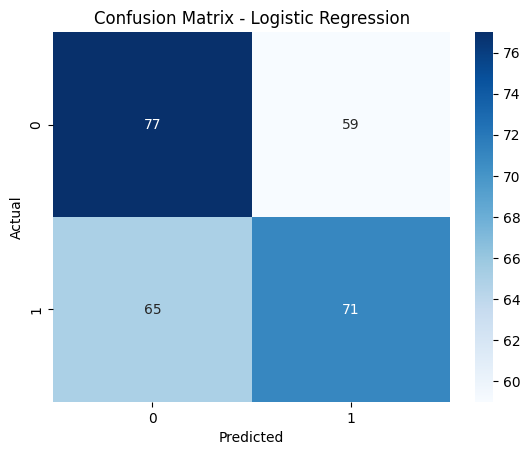


===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       136
           1       0.66      0.68      0.67       136

    accuracy                           0.67       272
   macro avg       0.67      0.67      0.67       272
weighted avg       0.67      0.67      0.67       272



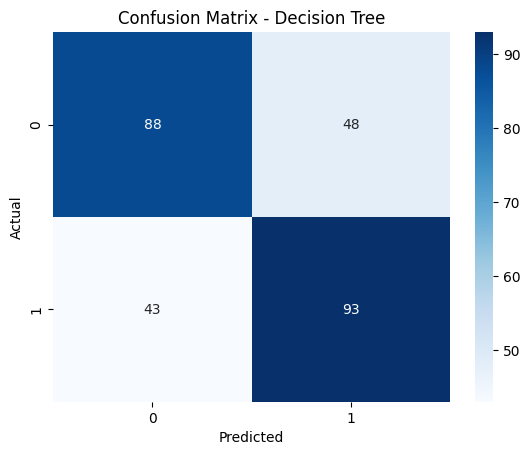


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       136
           1       0.72      0.78      0.75       136

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272



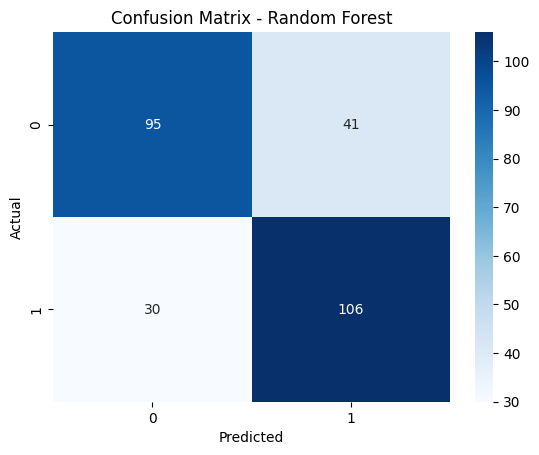


===== SVM =====
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       136
           1       0.69      0.64      0.66       136

    accuracy                           0.68       272
   macro avg       0.68      0.68      0.68       272
weighted avg       0.68      0.68      0.68       272



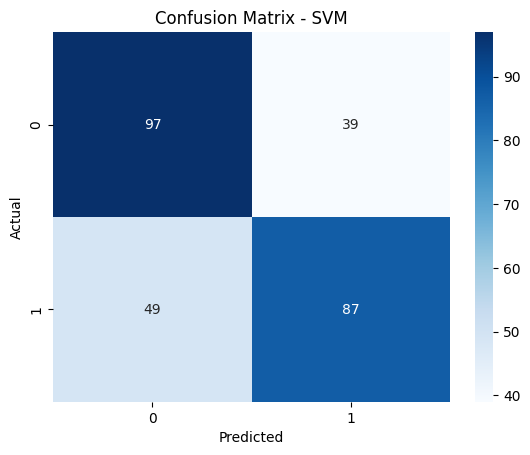

In [10]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


#Loan Approval Prediction

This project was about predicting whether someone applying for a loan is going to get it approved or not. At first glance, it sounds simple — yes or no — but it turned out to be a bit more involved than that. The main challenge was that the data wasn’t balanced. There were way more cases of approved loans compared to denied ones, which means a model could easily just say “approved” every time and still look pretty accurate. That wouldn’t be very useful in practice, so I knew from the start I had to look at other evaluation measures like precision, recall, and the F1 score instead of just accuracy.

The dataset had a mix of numbers and categories. Things like income and loan amount were straightforward, while details like gender, marital status, or property area were text-based. Some values were missing here and there, which is always a bit annoying but expected. I filled them in — using the most common values for categorical fields and the median for numbers. I figured that would be the least disruptive way. After that, I needed to convert all the categorical features into numbers. Label encoding did the job, though I did think about one-hot encoding for a second, but it would have blown up the number of columns, so I skipped it.
  
Something I didn’t realize until I started looking at the distributions was how different the scales were. Income values, for example, were way higher compared to credit history, so I standardized everything. Otherwise, the models might have paid more attention to income just because of its scale, not because it’s actually more important. On top of that, I used SMOTE to handle the imbalance, which basically created synthetic examples for the underrepresented class (the denied loans). That helped even things out so the models wouldn’t ignore that category.
  
For the modeling part, I tried a few approaches. Logistic regression was the starting point since it’s quick to run and gives a decent baseline. Then I went for decision trees and random forests because they can capture more complex patterns. I also included an SVM to see if it would perform well on the separation. To evaluate them, I checked precision, recall, F1 scores, and confusion matrices.
  
The results were kind of what I expected but with some surprises. Random forest came out on top, giving a good balance between precision and recall. Logistic regression was easy to interpret but missed out on some recall, so it wasn’t catching all the denied loans. The SVM worked but needed more tuning than I wanted to spend time on, and the decision tree did okay but clearly leaned toward overfitting. At first, I actually thought logistic regression would hold up better, but after running everything, random forest was clearly stronger.
  
  The main takeaway for me was that this kind of prediction task isn’t just about chasing the highest accuracy. It’s more about finding the right trade-off because approving someone who shouldn’t get a loan or denying someone who should both have real-world consequences. That’s why focusing on recall and F1 score made more sense than just bragging about accuracy. Overall, this project gave me a good reminder that preparing the data and choosing the right metrics are just as important as the actual model building.